# 5.2.1: Generating Example Classification Data

we'll start by generating data from two
separate two-dimensional normal distributions.

In [3]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
h = 1
sd = 1
n = 50

 
x1 = ss.norm.rvs(-h, sd1, n) # mean, std, size
# x1 because this will give me the x-coordinates of the points, or observations, that come from the first class of data.
y1 = ss.norm.rvs(0, sd, n)
# y coordinate of this observations

x2 = ss.norm.rvs(h, sd, n)
y2 = ss.norm.rvs(0, sd, n)

In [4]:
def gen_data(n, h, sd1, sd2):# size, mean, std for class1 and class2
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return(x1, y1, x2, y2)

In [5]:
(x1, y1, x2, y2) = gen_data(50, 1 ,1 ,1.5)

In [6]:
(x1, y1, x2, y2) = gen_data(1000, 1.5 ,1 ,1.5)

In [7]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")    
    plt.ylabel("$Y_1$")

    

    

<IPython.core.display.Javascript object>


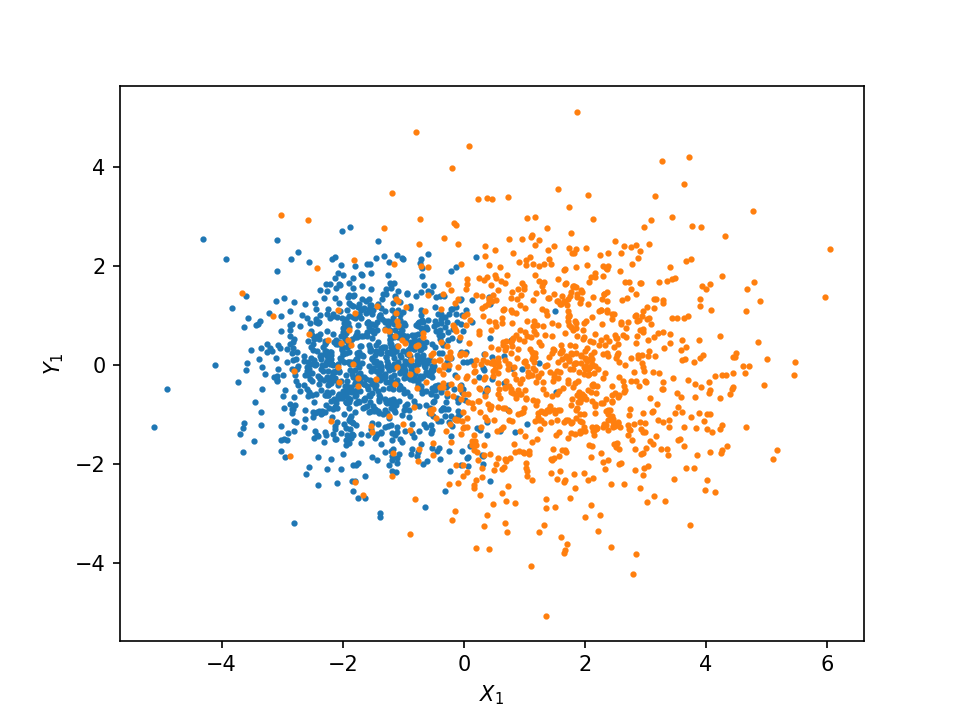

In [9]:
plot_data(x1, y1, x2, y2)
# the group of points on the left are the observations coming from class 1, 
# and the orange points on the right are the observations coming from class 2.

You'll see that the centers of these clouds of data points
are more or less symmetrically located around X1 is equal to 0.
But you should also see that the cloud on the right, the orange cloud,
is broader than the blue cloud.
And that's because we used to greater value for its standard deviation.


The group of points on the left are the observations coming from class 1, 
and the orange points on the right are the observations coming from class 2.

You'll see that the centers of these clouds of data points
are more or less symmetrically located around X1 is equal to 0.
But you should also see that the cloud on the right, the orange cloud,
is broader than the blue cloud.
And that's because we used to greater value for its standard deviation.

Which of the following function calls will produce data that would be easiest to classify correctly?
gen_data(1000, 0, 1, 1)
gen_data(1000, 1, 2, 2.5)
gen_data(1000, 10, 100, 100)
gen_data(1000, 20, .5, .5) # This is the answer


Which of the following function calls will produce data that would be hardest to classify correctly?
gen_data(1000, 0, 1, 1) # This is the answer
gen_data(1000, 1, 2, 2.5)
gen_data(1000, 10, 100, 100)
gen_data(1000, 20, .5, .5)

# 5.2.2: Logistic Regression

Now our goal is to predict a categorical outcome, such as blue or orange,
or 0 or 1, so we're dealing with a classification problem.

Our goal is to model the conditional probability
that the outcome belongs to a particular class conditional on the values
of the predictors.

If we have only two classes, we can code the responses, the class labels,
using 0s and 1s.
So the outcome, y, is always either 0 or 1.

So P(X) = P(Y=1|X) # Y is equal to 1 given the value of X, If y is not equal to 1, it must be 0.

The most obvious problem here is that the probability must always
lie between 0 and 1, but there is nothing here to constrain that.
So using this approach, we might get probabilities that are less than 0
or greater than 1, which is not sensible.

We take the log of (p(x)/ p(x)-1) to fix this.

Logistic regression is a linear model that models probabilities
on a non-linear scale.

(p(x)/ p(x)-1) odds of an event or (probability that event occurs/ probability that it does not occur)

we take the log of the odds, which gives us
the log odds of that particular event.
And log odds can vary from minus infinity to plus infinity.
So we can now use a linear model to model this expression here.

log((p(x)/ p(x)-1)) = Bo + B1X1 + .... BnXn

The coefficients, the betas, in this expression must be estimated from data.
And this is usually done using the method of maximum likelihood.
The intuition behind the maximum likelihood method
is to find parameter estimates that make the observed data maximally likely.


What is one of the problems with using linear regression to predict probabilities?
Answer: Linear regression may predict values outside of the interval between 0 and 1.

Assume that there are only two classes and all data points belong to one of these two classes. The probability that a given data point belongs to Class 1 is 0.2.

What are the odds that a given data point belongs to Class 2 as given by the function below?

In [12]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

prob_to_odds(.80)

4.000000000000001

# 5.2.3: Logistic Regression in Code

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression() # just creates model object

In [15]:
# We first have to stack our x1 y1 observations on top of x2 y2

#we'll put the first block on top of the second block.
#And we can do these operations using the vstack, or vertical stack,
#function in numpy and the hstack, or horizontal stack, also in numpy.

np.vstack((x1, y1)).shape # this has the wrong shape, two rows and 1000 columns, we want the transpose of this

(2, 1000)

In [16]:
np.vstack((x1, y1)).T.shape # now we have what we want,since we take the transpose of it.

(1000, 2)

In [19]:
np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T)) # we stack the others

array([[-2.79524783, -0.20625031],
       [-1.42942102, -0.9234304 ],
       [-0.99386032,  0.84266764],
       ...,
       [ 1.10156079,  2.1846331 ],
       [-0.34209186, -0.37209204],
       [-1.10458446,  0.88680136]])

In [20]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))

In [21]:
X.shape

(2000, 2)

In [26]:
# generate y vector
n = 1000
y = np.hstack((np.repeat(1, n), np.repeat(2, n)))

# We also need to generate the outcome vector y.
# In this case, I'm going to use the np.repeat function.
# So we have n observations coming from class 1.
# And we have the same number of observations coming from class 2
 # n elements long

In [27]:
y.shape

(2000,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 1) # xvar, yvar, proportion, randseed

In [30]:
X_train.shape # checking

(1000, 2)

In [31]:
clf.fit(X_train, y_train)

LogisticRegression()

In [32]:
clf.score(X_test, y_test)

0.91

clf.predict(np.array([-2,0]))

In [36]:
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))

array([[0.97777528, 0.02222472]])

0.97 probability that this particular test
point belongs to class 1.
And there is a 0.02 or 0.03 probability that it belongs to class 2.

In [37]:
clf.predict(np.array([-2, 0]).reshape(1, -1))

array([1])

In this case, our classifier predicts that for these given
values of covariates, minus 2 and 0, class 1 is the more likely class.

Part 1. If you have data and want to train a model, which method would you use?
Asnwer: clf.fit()

Part 2. If you want to compute the accuracy of your model, which method would you use?
Asnwer: clf.score()

Part 3. If you want to estimate the probability of a data point being in each class, which method would you use?
Asnwer: clf.predict_proba()

Part 4. If you want to know to which class your model would assign a new data point, which method would you use?
Asnwer: clf.predict()

# 5.2.4: Computing Predictive Probabilities Across the Grid


In [ ]:
Let's look at the problem again. We had two predictors, x1 and x2.
We put in a test point, which corresponded to some specific values of x1 and x2.
And what we computed was predictive probability, or conditional probability, that this particular observation
belongs to class 1 or class 2. In this example, we computed these two probabilities for a single point.
What we want to do next is to compute these probabilitiesat every point of the x1-x2 grid.


In [39]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

Let's look at it line by line. On the first line here we used the meshgrid.
We specify the range of values for x1 from minus 5 to plus 5 in increments of 0.1, and we do the same for the second variable x2. Then we call the meshgrid function, and we store the output into two matrices, which are xx1 and xx2 in this case.
Next, we will take the two matrices, xx1 and xx2, and we use the ravel method. So first, we turn xx1 into a vector here.
We do the same for xx2 using the ravel function. And then we stack these two vectors.
We then call the clf.predict_proba function, which gives us an array. Because we have two classes, this matrix here, probs,
is going to have n rows and two columns. I'm going to take in class number here as an input argument to this function.
So what happens is the following. In probs, I have, for every single observation, every single row,
I have the probability that this particular observation belongs to class 1 or class 2.
I want to extract all of the rows from this matrix. But I only want that particular column here that corresponds to class number. So, for example, if class number here is equal to 0, we will end up extracting the first column from this matrix.
After we do that, we assign that to a variable z. So at this point, z contains the conditional class probabilities,
which is what we wanted to compute. We have one more challenge here, however. Remember, we wanted to plot these on an x1, x2 plane, and z is going to be a long column vector. We therefore use the reshape function, which takes z and turns it
into the shape of xx1, in this case. You could use xx2 here, and it would work just the same.
We store the output in z, and then we call the contourf function to plot the value of z
at locations that are specified by xx1 and xx2. Finally, I plot a color bar, and I add axis labels to the plot.

<IPython.core.display.Javascript object>


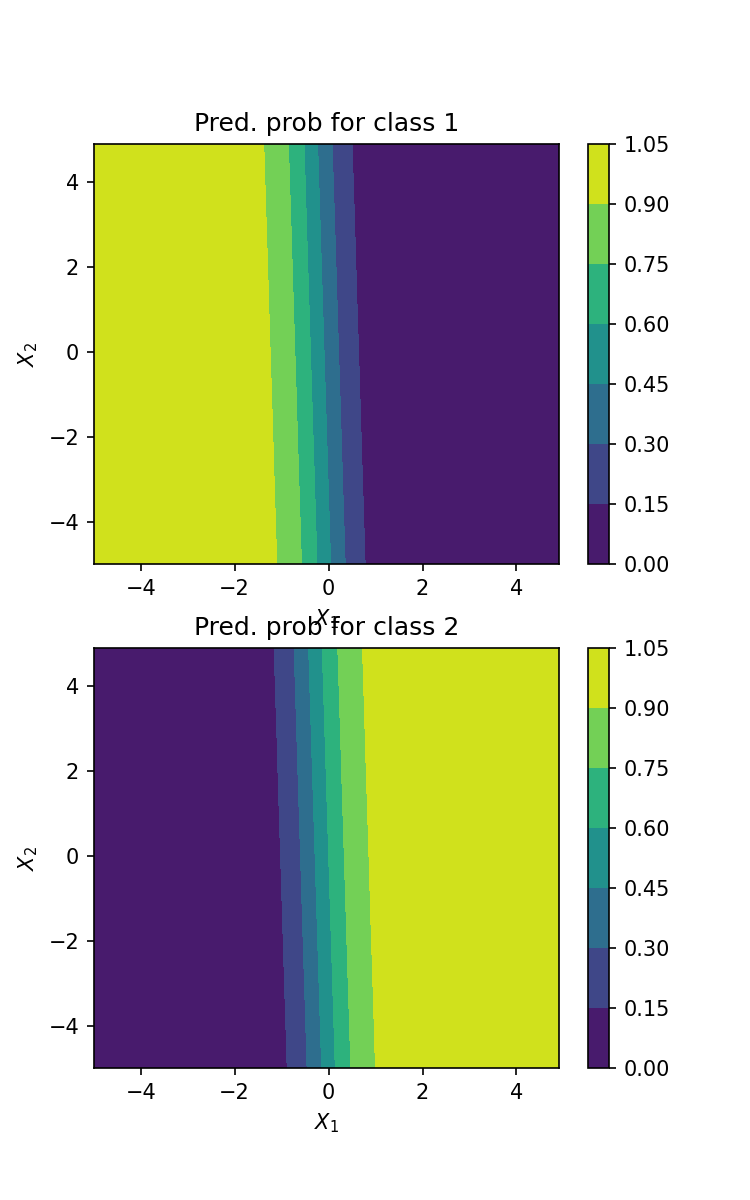

In [40]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

# We first create a figure of a particular size here.
# Then on the second line, we create a subplot
# and we call the plot_probs function.
# The first argument, which is what we haven't talked about yet,
# is the axis object of that particular subplot.
# The reason we need to provide this in here
# is because the contour function plotting command on this line in our function
# needs to know what are the axes into which the contour plot will be added.
# Then we add, finally, a title to our plot.
# We run this function call two times.
# The first time we call a plot probes function,
# we're estimating the probabilities that these different observations belong
# to class 0, the first class.
# Then we run it for the second time where the last argument
# is 1, which gives us the predictive probabilities for the observationsto belong to class 2.

We first create a figure of a particular size here.
Then on the second line, we create a subplot
and we call the plot_probs function.
The first argument, which is what we haven't talked about yet,
is the axis object of that particular subplot.
The reason we need to provide this in here
is because the contour function plotting command on this line in our function
needs to know what are the axes into which the contour plot will be added.
Then we add, finally, a title to our plot.
We run this function call two times.
The first time we call a plot probes function,
we're estimating the probabilities that these different observations belong
to class 0, the first class.
Then we run it for the second time where the last argument
is 1, which gives us the predictive probabilities for the observations
to belong to class 2.

In this case, where the training data in each class
are generated from bivariate Gaussian distributions,
it turns out that a linear decision boundary is the best one can do.
If we had more than two Gaussian distributions generating the data,
then the optimal decision boundary would be non-linear.
And generally, a linear model would usually not do a good job.


What does the pattern of probabilities across the grid (at 7:34 in Video 5.2.4) indicate about X1 and X2 ?
Answer: The class probability is determined mostly by X1. 

The sum of the class probabilities:
Answer: will always equal 1 for any number of classes.